                        | Physical Model | Augmented Model
-------------------------------------------------------------------------------------------
R2 Score in Training    |     0.936      |      0.993
-------------------------------------------------------------------------------------------
R2 Score in Validation  |     0.933      |      0.989
-------------------------------------------------------------------------------------------
R2 Score in Testing     |     0.933      |      0.989
-------------------------------------------------------------------------------------------
RMSE in Training        |     0.546      |      0.180
-------------------------------------------------------------------------------------------
RMSE in Validation      |     0.545      |      0.221
-------------------------------------------------------------------------------------------
RMSE in Testing         |     0.545      |      0.221


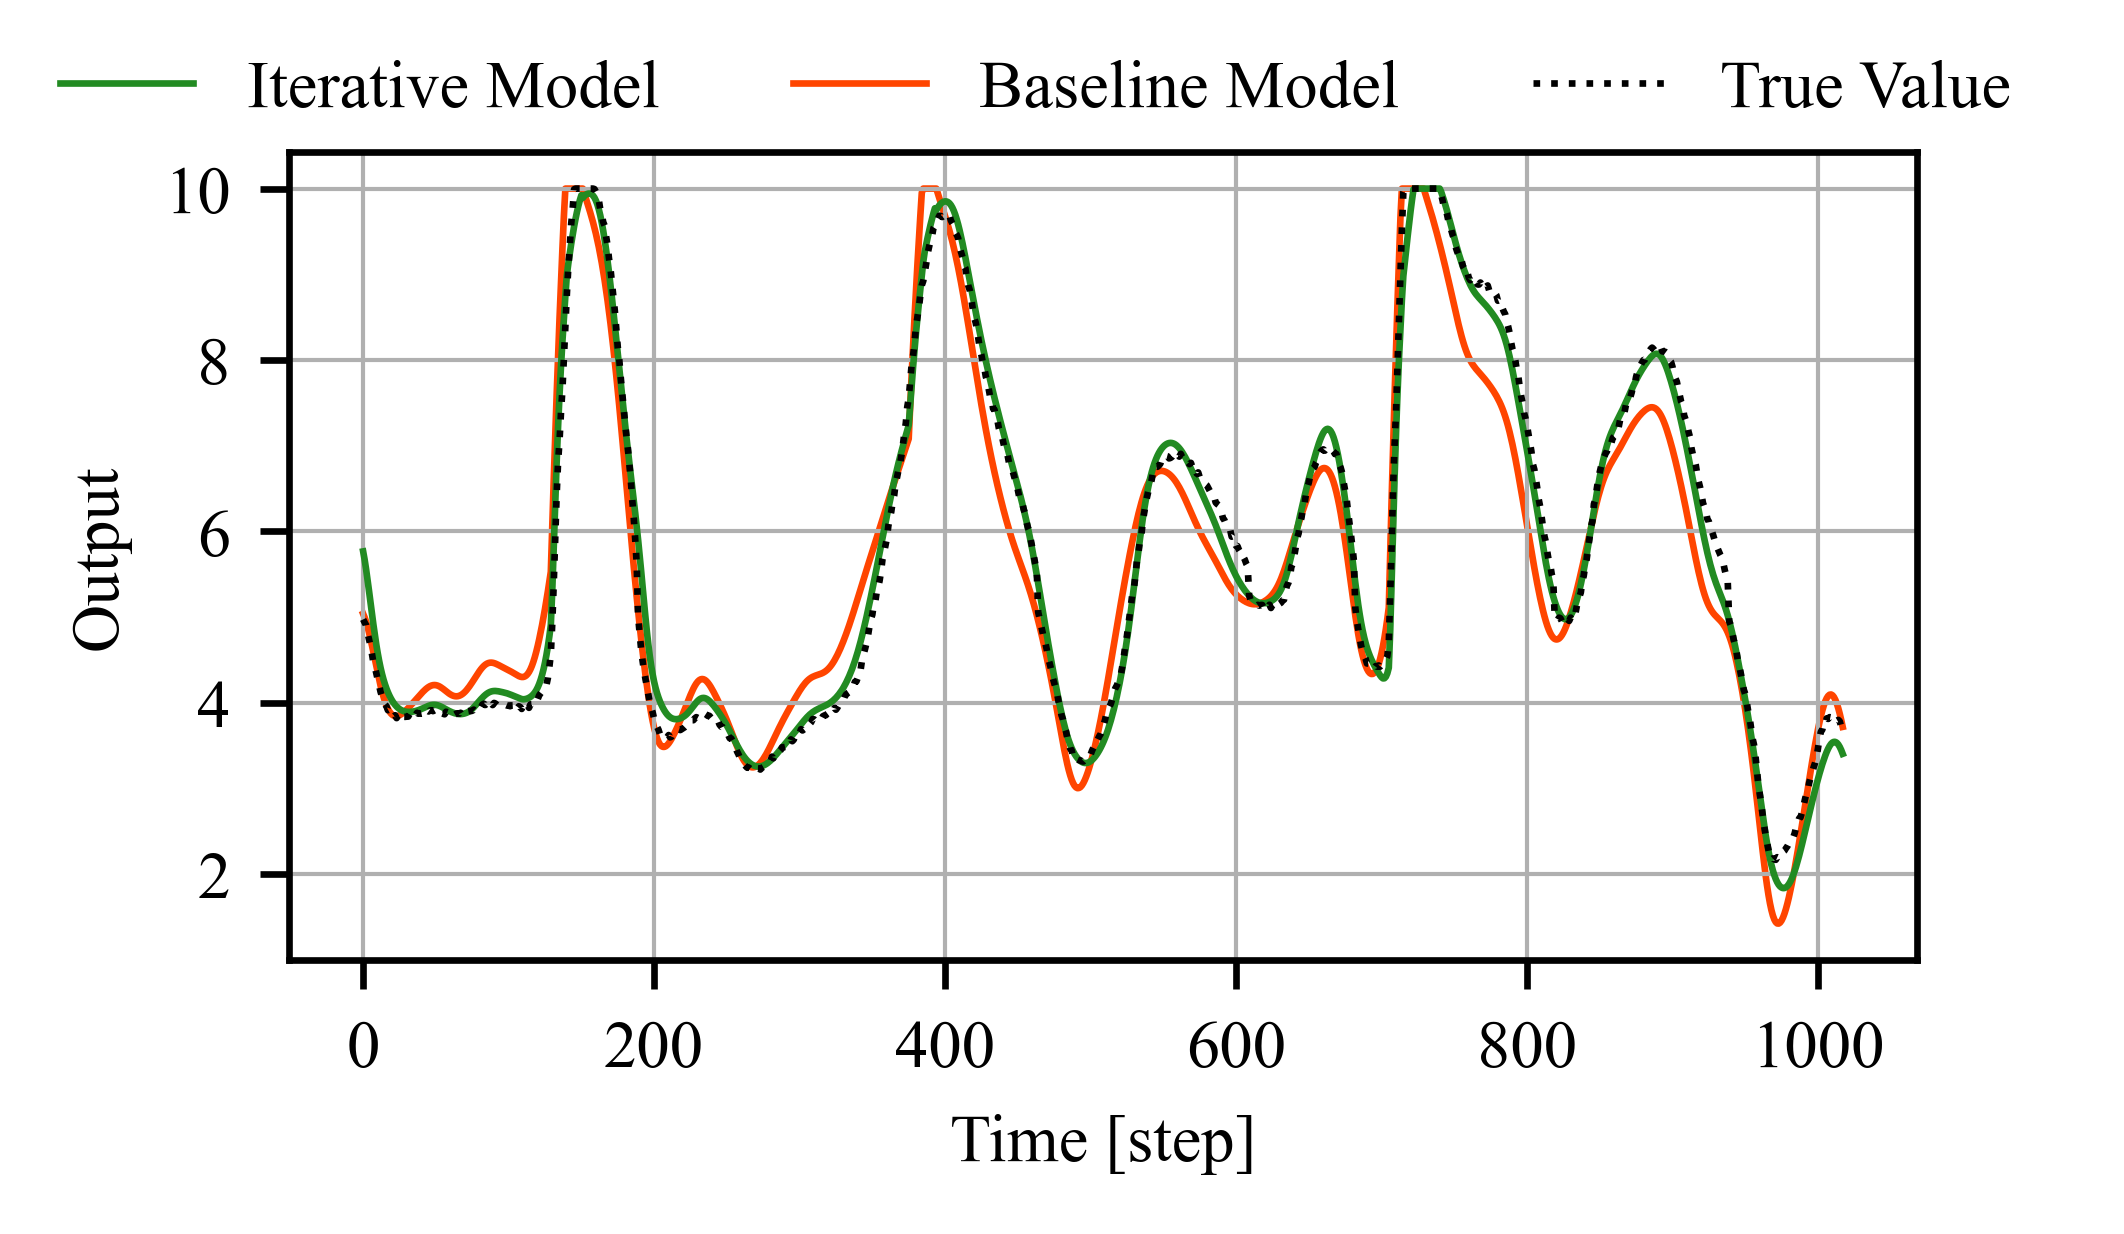

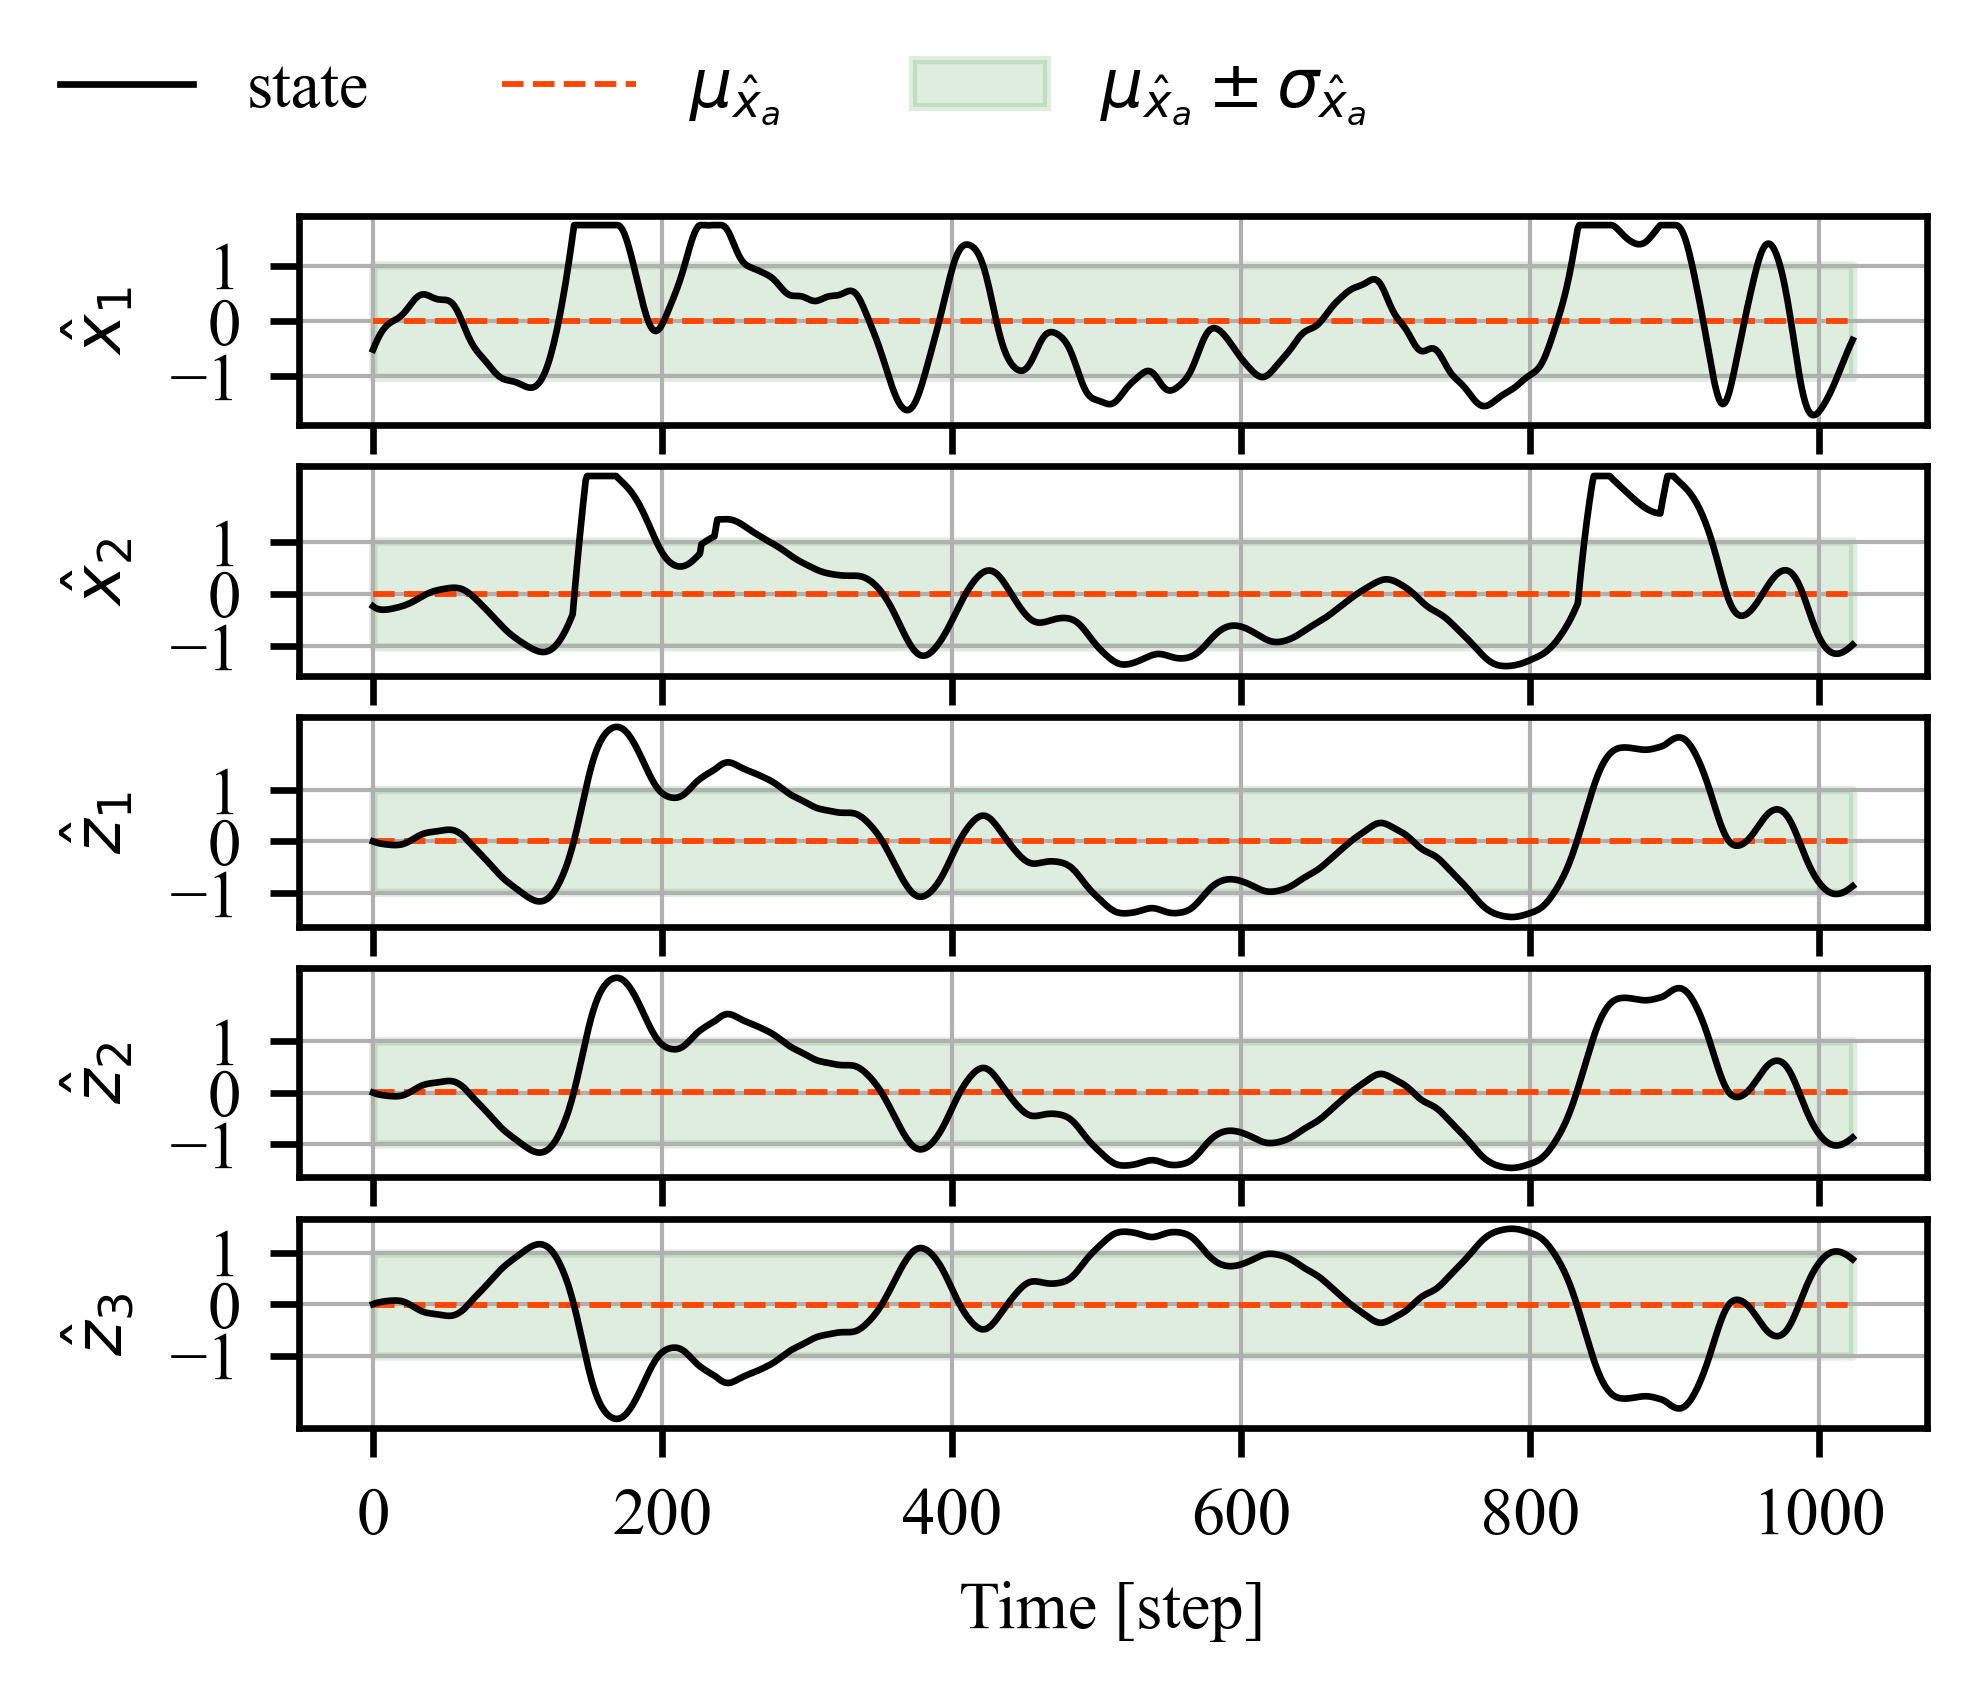

{'augmentation': 'Exact - MANAM', 'epochs_neural': 100, 'epochs_phys': 10, 'gamma_power': 0.1, 'data_type': 'RealData', 'execution_time': 206.51146697998047}


In [1]:
from T1_1_Functions import result_plot
import pickle as pkl
import os

## High-Key Variables
augmentation  = "Exact - MANAM"

gamma_power = 0.1

lr_mu_x    = 1e-3
lr_sigma_x = 1e-3
# lr_mu_x    = 0
# lr_sigma_x = 0

## Experiment Naming 
prefix_name="Exp_"
id_num = "0"
## Data Type
data_type = "RealData"

## State Statistics Config
if augmentation == "Exact" or augmentation == "Robust" or augmentation == "Exact - NonNormalized" or augmentation == "Robust - NonNormalized":
    method_suffix = "ConstStat"
else:
    method_suffix = "AdpStat" 

if lr_mu_x == 0 and lr_sigma_x == 0:
    method_suffix = "ConstStat"
    
## Itertive Normalization Naming
if gamma_power == 0:
    adaptive_gamma_eval = False
else:
    adaptive_gamma_eval = True

if augmentation == "Exact - MANAM" or augmentation == "Robust - MANAM":
    if gamma_power == 0:
        if augmentation == "Exact - MANAM":
            method = "Exact"
        if augmentation == "Robust - MANAM":
            method = "Robust"
    else:
        method = augmentation
else:
    method = augmentation     
        
config_dict_default_suffix="_config.pkl"
result_dict_default_suffix= "_result.pkl"

config_dict_default_suffix="_config.pkl"
result_dict_default_suffix= "_result.pkl"
folder_dir= 'dicts'
experiment_id = str(id_num) + '_' + method + method_suffix
config_file_name = prefix_name + experiment_id + data_type +  config_dict_default_suffix
result_file_name = prefix_name + experiment_id + data_type +  result_dict_default_suffix
config_file_dir = os.path.join(folder_dir, config_file_name)
result_file_dir = os.path.join(folder_dir, result_file_name)

# Loading the dict Storage
with open(config_file_dir, "rb") as pickle_file:
    config_dict_imported = pkl.load(pickle_file)

with open(result_file_dir, "rb") as pickle_file:
    result_dict_imported = pkl.load(pickle_file)

# Plotting the results
result_plot(datascaler      = result_dict_imported["datascaler"],
            y_train         = result_dict_imported["y_train"],
            y_val           = result_dict_imported["y_val"],
            y_test          = result_dict_imported["y_test"],
            y_sim_phys      = result_dict_imported["y_sim_phys"],
            y_val_phys      = result_dict_imported["y_val_phys"],
            y_test_phys     = result_dict_imported["y_test_phys"],
            y_sim_neural    = result_dict_imported["y_sim_neural"],
            y_val_neural    = result_dict_imported["y_val_neural"],
            y_test_neural   = result_dict_imported["y_test_neural"],
            x_b_sim_neural  = result_dict_imported["x_b_sim_neural"],
            x_b_val_neural  = result_dict_imported["x_b_val_neural"],
            x_b_test_neural = result_dict_imported["x_b_test_neural"],
            x_f_sim_neural  = result_dict_imported["x_f_sim_neural"],
            x_f_val_neural  = result_dict_imported["x_f_val_neural"],
            x_f_test_neural = result_dict_imported["x_f_test_neural"],
            method_name=r'Iterative Model',
            save_figs=True)

# Printing the Config files
print(config_dict_imported)